# Finance Data Project

The project analyses the the prices of some bank stocks and and their progress throughout the financial crisis (2007-08) all the way to early 2016. The dataset contains stock information for the following banks:
*  BAC: Bank of America
* C: CitiGroup
* GS: Goldman Sachs
* JPM: JPMorgan Chase
* MS: Morgan Stanley
* WF: Wells Fargo



## Import libraries and data

In [36]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

df=pd.read_pickle('all_banks')
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

** Create a list of the ticker symbols in alphabetical order.**

In [37]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Set names for the column levels:**

In [38]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

NameError: name 'bank_stocks' is not defined

# Explore the data

** The max Close price for each bank's stock throughout the time period**

In [39]:
df.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** The return values are  now created and stored in dataframe called returns usning pandas pct_change() method on the Close column.**

In [40]:
returns = pd.DataFrame()

for tick in tickers:
    returns[tick+' Return'] = df[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Inspect the date of the largest drop and biggest gain of the bank stockes**

In [41]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [42]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**  The riskiest stock (corresponding to the highest std) for the year 2015 can be found using standard deviation method .std() **

In [43]:
returns.ix['2015-01-01':'2015-12-31'].std()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

____
# Data Visualization

** A line plot showing Close price for each bank for the entire index of time.**

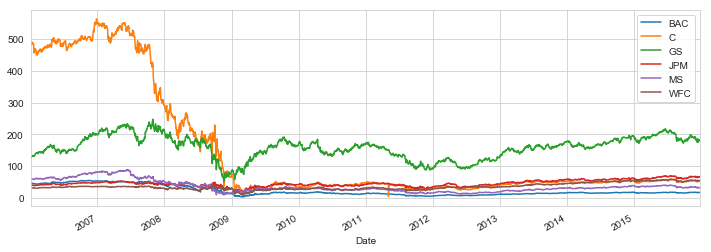

In [44]:
for tick in tickers:
    df[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()
plt.savefig('Close_price.png', dpi=200)

## Moving Averages

Analyse the moving averages for these stocks in the period 2007-2009 BAC. 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



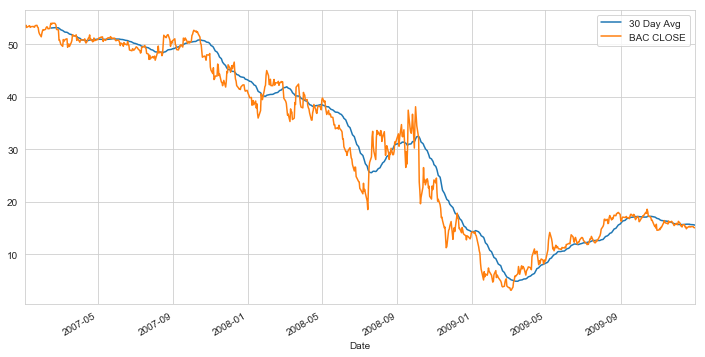

In [45]:
plt.figure(figsize=(12,6))
df['BAC']['Close'].ix['2007-01-01':'2010-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
df['BAC']['Close'].ix['2007-01-01':'2010-01-01'].plot(label='BAC CLOSE')
plt.legend()
plt.savefig('moving_average_BAC.png', dpi=200)

** Clustermap to cluster the correlations together of the bank stockes:**

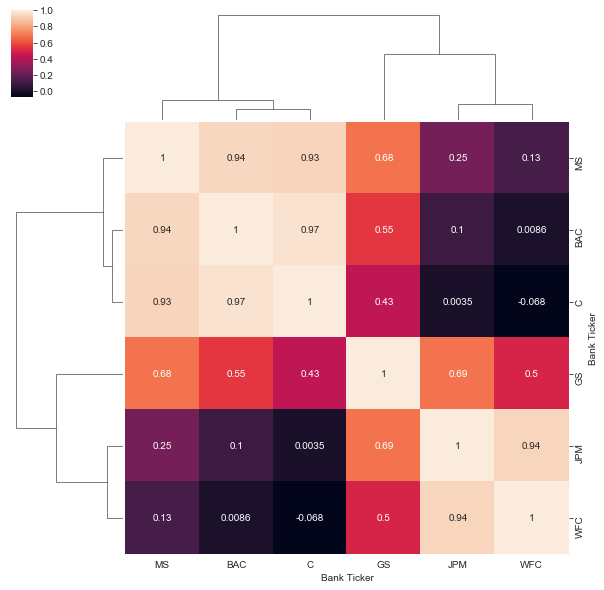

In [46]:
sns.clustermap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)
plt.savefig('clustermap.png', dpi=200)